Limite de entrega hasta el 16 de marzo a horas 23:59 (hora Bolivia). Al correo fernandosilva.clases@gmail.com

### Nombres integrantes:
* Horacio Molina



---



# Reconocimiento Facial usando reducción de dimensionalidad (PCA, LDA) y Supervised Machine Learning Models

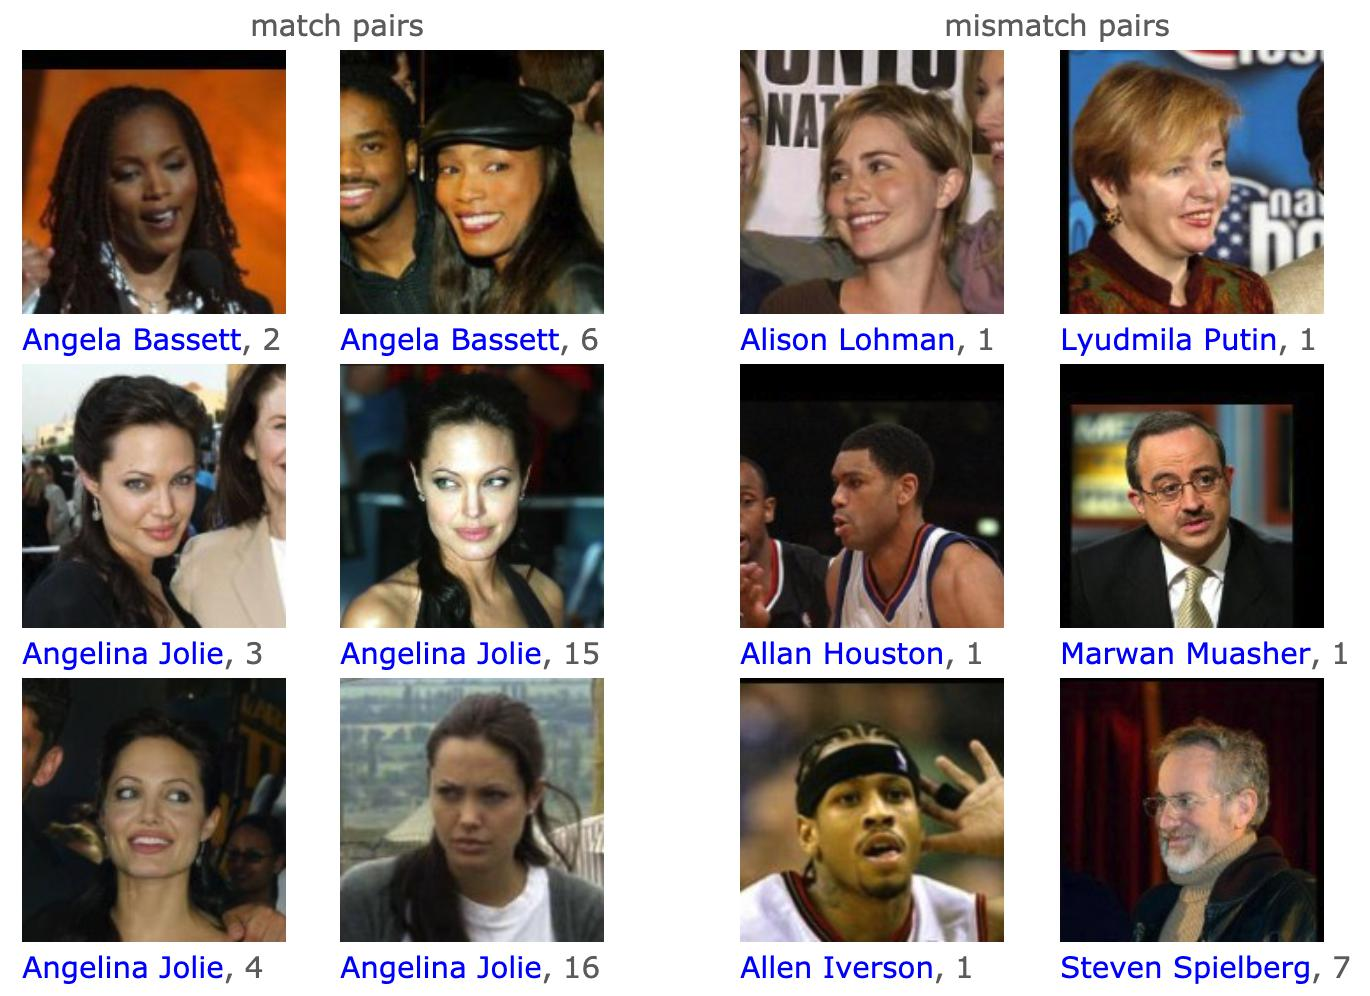

Importamos los datos y mostramos algunas imágenes de rostros

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Cargamos el dataset LFW desde scikit-learn
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Cargamos el dataset de LFW (Labeled Faces in the Wild)

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

Vemos la descripción del dataset

In [3]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

Graficamos algunas imágenes de ejemplo

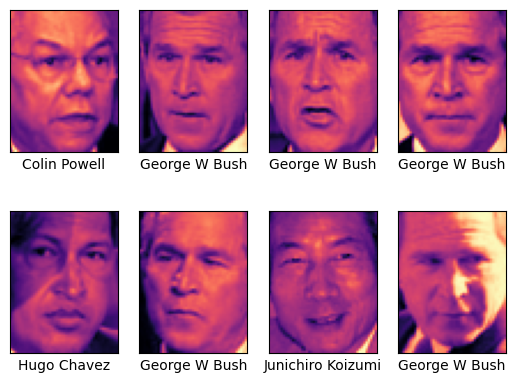

In [4]:
fig, splts = plt.subplots(2, 4)
for i, splt in enumerate(splts.flat):
    splt.imshow(faces.images[i], cmap='magma')
    splt.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

Asignamos los datos de entrada (X) y las etiquetas de salida (y)

In [5]:
X = faces.data
y = faces.target

Preparamos los datos para entrenar el modelo. Realiza holdout.

In [6]:
X.shape

(1348, 2914)

In [8]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

# Cargar el dataset LFW, considerando solo personas con al menos 50 imágenes
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

# Extraer los datos y las etiquetas
X = lfw_people.data        # Cada fila es una imagen aplanada
y = lfw_people.target      # Etiquetas numéricas
target_names = lfw_people.target_names
n_samples, n_features = X.shape
n_classes = target_names.shape[0]

print("Número de muestras:", n_samples)
print("Número de features (píxeles):", n_features)
print("Número de clases/personas:", n_classes)

# Dividir el dataset en entrenamiento y prueba (25% para prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)


Número de muestras: 1560
Número de features (píxeles): 1850
Número de clases/personas: 12


# Parte A

Aplica PCA. Usa 150 componentes y un random state de 42.

Revisa la documentación en https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [9]:
from sklearn.decomposition import PCA


Entrena dos modelos de clasificación. SVM (SVC) y KNN

Evalua el modelo

El siguiente bloque de codigo nos permite ver cual era la clase original y cual fue la predicción del modelo.

Probablemente te de error si usaste otros nombres para las variables. En ese caso deberás modificar el código. Por ejemplo, quiza nombraste y_target en vez de y_test.

In [7]:
incorrect = 0
total = len(predictions)

print("\nActual\t\t\Predicción\n")

for i in range(total):
    actual_name = faces.target_names[y_test[i]]
    predicted_name = faces.target_names[predictions[i]]

    if predictions[i] != y_test[i]:
        incorrect += 1
        print(f"{actual_name}\t\t\t{predicted_name}")

print(f"\n{total - incorrect} clasificaciones correctas y {incorrect} incorrectas.")

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\DATABYTES\AppData\Local\Temp\ipykernel_16404\2092392468.py:4: SyntaxWarning: invalid escape sequence '\P'
  print("\nActual\t\t\Predicción\n")


C:\Users\DATABYTES\AppData\Local\Temp\ipykernel_16404\2092392468.py:4: SyntaxWarning: invalid escape sequence '\P'
  print("\nActual\t\t\Predicción\n")


NameError: name 'predictions' is not defined

Aplica la matriz de confusión

In [ ]:
matrix = confusion_matrix(y_test, predictions)
print("\nMatriz de confusión:")
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpreta los resultados obtenidos. ¿Cuál fue el desempeño de PCA y modelo SML? ¿Cómo crees que podria mejorar el desempeño?

Nota: Es esperable que las métricas esten entrre 0.65 a 0.85

RESPUESTA:

---

# Parte B

* Aplica LDA
* Aplica SVM, KNN sobre los datos obtenidos de LDA (usa las mismas configuraciones)
* Obten la matriz de confusión de SVM y KNN
* Interpreta los resultados
* Interpreta la diferencia entre lo obtenido usando los valores de PCA y LDA